In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,NaN,15.6,NaN,2.80,3.06,0.28,2.29,5.64,NaN,3.92,NaN
1,NaN,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,NaN,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,NaN,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,NaN,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,NaN,20.0,120.0,1.65,0.68,0.53,1.46,NaN,NaN,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	8
float64		column 3	11
float64		column 4	13
float64		column 5	14
float64		column 6	14
float64		column 7	5
float64		column 8	8
float64		column 9	6
float64		column 10	6
float64		column 11	8
float64		column 12	5
float64		column 13	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,171.000000,170.000000,167.000000,165.000000,164.000000,164.000000,173.000000,170.000000,172.000000,172.000000,170.000000,173.000000,168.000000
mean,13.020936,2.370118,2.371437,19.296364,99.353659,2.304329,2.040058,0.361176,1.601163,5.047442,0.958565,2.618844,738.714286
std,0.804340,1.129539,0.277331,3.216571,14.330774,0.627960,0.995300,0.122826,0.573506,2.331536,0.227436,0.706289,308.882497
min,11.410000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.602500,2.210000,17.000000,88.000000,1.735000,1.220000,0.270000,1.250000,3.147500,0.790000,2.000000,500.000000
50%,13.050000,1.875000,2.360000,19.000000,97.000000,2.380000,2.140000,0.340000,1.560000,4.690000,0.960000,2.780000,666.000000
75%,13.700000,3.157500,2.580000,21.500000,107.000000,2.807500,2.880000,0.430000,1.962500,6.212500,1.120000,3.170000,973.750000
max,14.830000,5.800000,3.230000,28.500000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

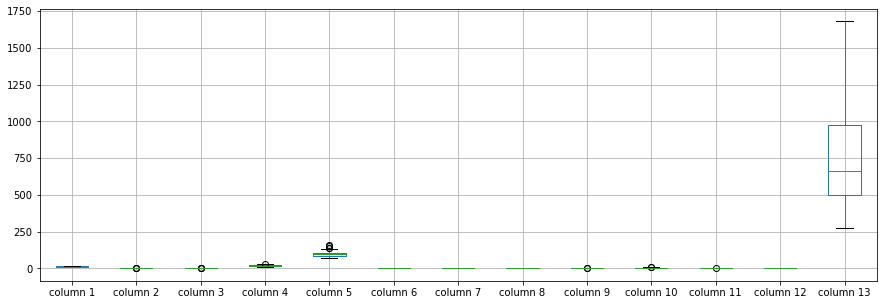

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.020936
column 2       2.370118
column 3       2.371437
column 4      19.296364
column 5      99.353659
column 6       2.304329
column 7       2.040058
column 8       0.361176
column 9       1.601163
column 10      5.047442
column 11      0.958565
column 12      2.618844
column 13    738.714286
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.080710,0.216649,-0.310411,0.230199,0.306743,0.233696,-0.131302,0.154113,0.566812,-0.013147,0.083627,0.651070
column 2,0.080710,1.000000,0.174881,0.342482,-0.046848,-0.338825,-0.401935,0.289277,-0.218422,0.248811,-0.560971,-0.378404,-0.179733
column 3,0.216649,0.174881,1.000000,0.428774,0.261107,0.135511,0.154211,0.191325,0.023597,0.261193,-0.028827,0.032553,0.255449
column 4,-0.310411,0.342482,0.428774,1.000000,-0.113411,-0.390307,-0.363092,0.403092,-0.230756,0.027978,-0.312076,-0.301688,-0.444193
column 5,0.230199,-0.046848,0.261107,-0.113411,1.000000,0.256193,0.172916,-0.250659,0.230419,0.191751,0.038009,0.038772,0.404086
column 6,0.306743,-0.338825,0.135511,-0.390307,0.256193,1.000000,0.865988,-0.465776,0.643516,0.003744,0.400231,0.726158,0.518898
column 7,0.233696,-0.401935,0.154211,-0.363092,0.172916,0.865988,1.000000,-0.525866,0.640428,-0.153964,0.528797,0.785817,0.467987
column 8,-0.131302,0.289277,0.191325,0.403092,-0.250659,-0.465776,-0.525866,1.000000,-0.356803,0.123998,-0.221950,-0.499298,-0.306077
column 9,0.154113,-0.218422,0.023597,-0.230756,0.230419,0.643516,0.640428,-0.356803,1.000000,-0.025713,0.286376,0.523494,0.291875
column 10,0.566812,0.248811,0.261193,0.027978,0.191751,0.003744,-0.153964,0.123998,-0.025713,1.000000,-0.496647,-0.404609,0.342424


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+67,13+67+67,13+67+67,13+67+67+67+67,13+67+67+67+67+67,13+67+67+67+67+67+67,13+67+67+67+67+67,13+67+67+67+67,13+67+67+67,13+67+67,13+67,13], vae_layer = False, seed = 670)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 897.088134765625
Epoch: 1 , loss: 895.55859375
Epoch: 2 , loss: 892.8662442294034
Epoch: 3 , loss: 893.190840287642
Epoch: 4 , loss: 888.6327514648438
Epoch: 5 , loss: 893.4100064364346
Epoch: 6 , loss: 890.5326649058949
Epoch: 7 , loss: 894.0125066583806
Epoch: 8 , loss: 890.3190640536221
Epoch: 9 , loss: 893.595986106179
Epoch: 10 , loss: 889.8026844371449
Epoch: 11 , loss: 891.2199596058239
Epoch: 12 , loss: 890.2428477894176
Epoch: 13 , loss: 893.8889825994319
Epoch: 14 , loss: 894.9844304865056
Epoch: 15 , loss: 884.483681418679
Epoch: 16 , loss: 891.9130637428977
Epoch: 17 , loss: 884.2496004971591
Epoch: 18 , loss: 884.0459261807529
Epoch: 19 , loss: 880.8413141424006
Epoch: 20 , loss: 887.9566816850142
Epoch: 21 , loss: 878.9581076882102
Epoch: 22 , loss: 879.3427124023438
Epoch: 23 , loss: 863.9654873934659
Epoch: 24 , loss: 873.7717174183239
Epoch: 25 , loss: 867.9627463600852
Epoch: 26 , los

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,-1.356383,0.000000,-114.07804,0.000000,0.0,0.0,0.0,0.000000,-0.622550,0.0,-1023.860394
1,-11.648774,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,0.00000,-1.781977,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
174,0.000000,0.0,0.000000,-17.260152,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
175,0.000000,0.0,0.000000,0.000000,0.00000,-0.594389,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
176,0.000000,0.0,-1.798905,0.000000,0.00000,0.000000,0.0,0.0,0.0,-8.445737,-0.414015,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2945.892692409355, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.2703130482181164

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,1.073617,15.600000,12.92196,2.800000,3.06,0.28,2.29,5.640000,0.417450,3.92,41.139606
1,1.551226,1.78,2.140000,11.200000,100.00000,2.650000,2.76,0.26,1.28,4.380000,1.050000,3.40,1050.000000
2,13.160000,2.36,2.670000,18.600000,101.00000,2.800000,3.24,0.30,2.81,5.680000,1.030000,3.17,1185.000000
3,14.370000,1.95,2.500000,16.800000,113.00000,3.850000,3.49,0.24,2.18,7.800000,0.860000,3.45,1480.000000
4,13.240000,2.59,2.870000,21.000000,118.00000,1.018023,2.69,0.39,1.82,4.320000,1.040000,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.450000,20.500000,95.00000,1.680000,0.61,0.52,1.06,7.700000,0.640000,1.74,740.000000
174,13.400000,3.91,2.480000,5.739848,102.00000,1.800000,0.75,0.43,1.41,7.300000,0.700000,1.56,750.000000
175,13.270000,4.28,2.260000,20.000000,120.00000,0.995611,0.69,0.43,1.35,10.200000,0.590000,1.56,835.000000
176,13.170000,2.59,0.571095,20.000000,120.00000,1.650000,0.68,0.53,1.46,0.854263,0.185985,1.62,840.000000


In [20]:
imputations[-1].to_excel("Wine_C_5(imp).xlsx", index=False, header=False)